<h3>Analysing the effects of Promotions in sales revenue</h3>

<li>Store: the store code. We have 9 stores in total.</li><li>
Product: the product code. We have 3 products in total.</li><li>
Is_Holiday: an indicator for whether that week contains holiday: 0 = no, 1 = yes.</li><li>
Base Price: base or everyday price without discount.</li><li>
Price: Actual price for each week. They are either promotion prices when promotion is going on or everyday prices otherwise.</li><li>
Weekly_Units_Sold: Weekly units sold.</li>


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

Read data from the csv file

In [ ]:
df=pd.read_csv("Sales_Product_Price_by_Store.csv")

In [ ]:
df.head()

,Store,Product,Date,Is_Holiday,Base Price,Price,Weekly_Units_Sold
0,1,1,02-05-10,False,9.99,7.99,245
1,1,1,02-12-10,True,9.99,7.99,453
2,1,1,2/19/2010,False,9.99,7.99,409
3,1,1,2/26/2010,False,9.99,7.99,191
4,1,1,03-05-10,False,9.99,9.99,145


Preprocess Data

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Weekly_Sales'] = df['Price'] * df['Weekly_Units_Sold']

In [ ]:
#check if there are null values
df.isna().sum()

Store                0
Product              0
Is_Holiday           0
Base Price           0
Price                0
Weekly_Units_Sold    0
Year                 0
Month                0
Day                  0
Weekly_Sales         0
dtype: int64

In [ ]:
promo_rows = (df["Base Price"] > df["Price"]).sum()
non_promo_rows = (df["Base Price"] == df["Price"]).sum()
#Check if there is any with Base Price more than PromoPrice
invalid_rows = (df["Base Price"] < df["Price"]).sum()

print(f"There {promo_rows} weeks where there were promotions and {non_promo_rows} where there was no promotion ")

There 666 weeks where there were promotions and 3195 where there was no promotion 


Check Unique Product

In [ ]:
#Get number of stores and Products
stores = df["Store"].nunique()
products=df["Product"].nunique()
print(f"There are {stores} stores and {products} products")

There are 9 stores and 3 products


In [ ]:
#Add a new column is_promo, to represent if it is promotion or not
df["Is_Promo"]=(df["Base Price"]!=df["Price"]).astype(int)
df["Is_Holiday"] = df["Is_Holiday"].astype(int)


In [ ]:
# Check if all Is_Promo values are equal to Is_Holiday values
if df["Is_Promo"].equals(df["Is_Holiday"]):
    print("All Is_Promo values are equal to Is_Holiday values.")
else:
    print("Not all Is_Promo values are equal to Is_Holiday values.")

Not all Is_Promo values are equal to Is_Holiday values.


Explanatory Data Analysis(EDA)

In [ ]:
df.groupby('Store')['Weekly_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Store,,,,,,,,
1,429.0,1789.414172,900.074226,769.65,1208.90,1659.17,1957.20,6816.59
2,429.0,2469.447413,1328.162884,1143.48,1579.21,2215.08,2756.55,9110.00
3,429.0,670.924009,366.816321,229.77,459.77,619.69,730.78,2650.00
4,429.0,3078.462145,1746.147872,1099.45,1818.18,2626.61,3837.51,13753.12
5,429.0,588.922984,242.628977,285.87,461.23,519.74,613.53,2264.97
6,429.0,2066.705082,1163.284768,890.19,1418.58,1758.40,2156.40,7936.03
7,429.0,955.115058,489.084883,389.61,649.35,857.61,1041.51,3270.00
8,429.0,1352.094056,811.326288,516.53,846.23,1275.87,1491.51,6656.67
10,429.0,4093.407249,3130.087191,1483.65,2462.88,3707.81,4510.47,25570.00


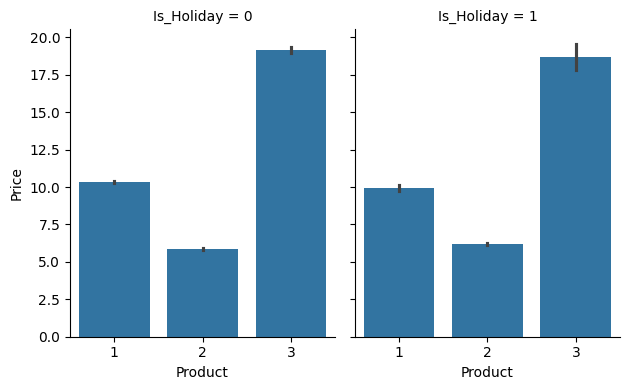

In [ ]:
#Check if during the holiday there was a change in prices
g = sns.FacetGrid(df, col="Is_Holiday", height=4, aspect=.8)
g.map(sns.barplot, "Product", "Price")
plt.show()

<mark>From the above table we notice that, there was no change in price during holidays</mark>

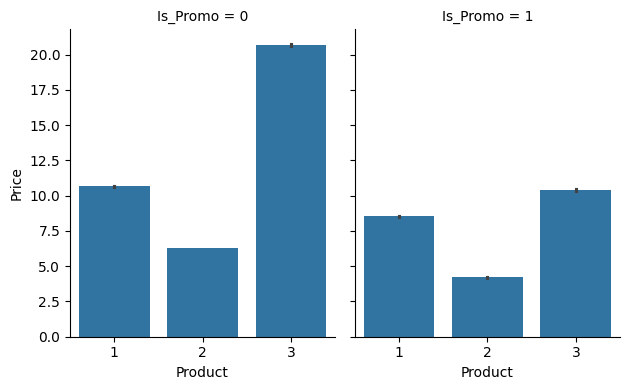

In [ ]:
#Check for promotions ....
g = sns.FacetGrid(df, col="Is_Promo", height=4, aspect=.8)
g.map(sns.barplot, "Product", "Price")
plt.show()

<mark>We can see that price are lower when there is promo, This is obvious but worth to explore</mark>

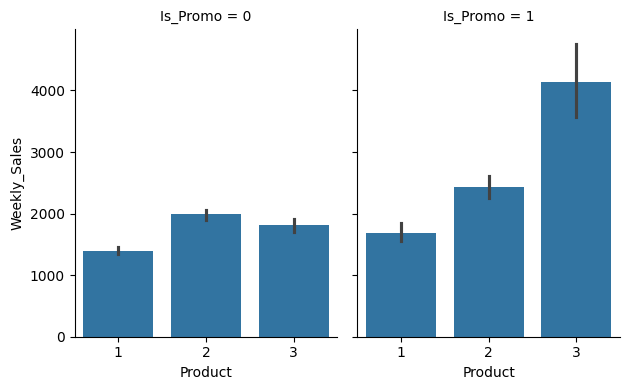

In [ ]:
g = sns.FacetGrid(df, col="Is_Promo", height=4, aspect=.8)
g.map(sns.barplot, "Product", "Weekly_Sales")
plt.show()

<ul >
<li>Product 2 is the cheapest product among all the three products, and it sells the most when there is no promo. But durinng promotions, product 3 sells the most</li>
<li >Product 3 is the most expensive product among all the three products.</li>
<li>There is little change in sales, for product  1 and 2</li></ul>

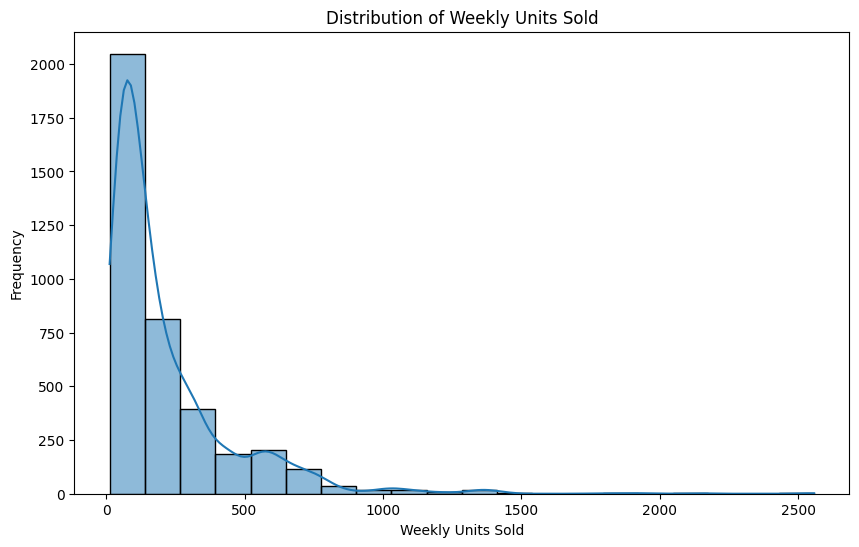

In [ ]:
# Histogram of Weekly_Units_Sold
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Weekly_Units_Sold', bins=20, kde=True)
plt.title('Distribution of Weekly Units Sold')
plt.xlabel('Weekly Units Sold')
plt.ylabel('Frequency')
plt.show()


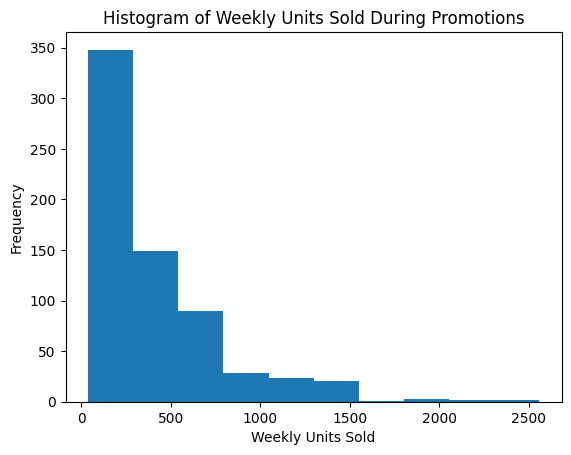

In [ ]:
# Histogram of Weekly_Units_Sold during promotions
plt.hist(df[df["Is_Promo"]==1]["Weekly_Units_Sold"])
plt.xlabel("Weekly Units Sold")
plt.ylabel("Frequency")
plt.title("Histogram of Weekly Units Sold During Promotions")
plt.show()

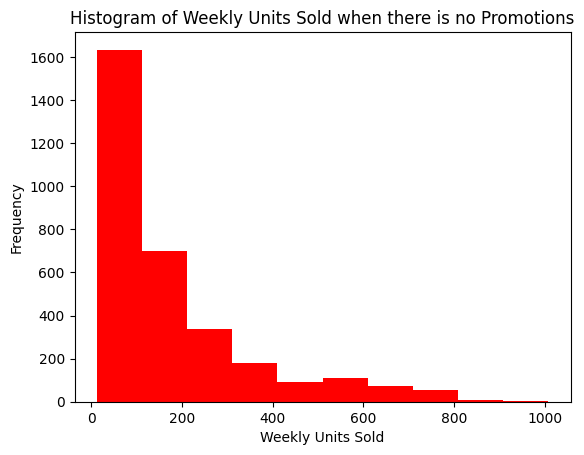

In [ ]:
# Histogram of Weekly_Units_Sold when there is no promotions
plt.hist(df[df["Is_Promo"]==0]["Weekly_Units_Sold"],color="red")
plt.xlabel("Weekly Units Sold")
plt.ylabel("Frequency")
plt.title("Histogram of Weekly Units Sold when there is no Promotions")
plt.show()

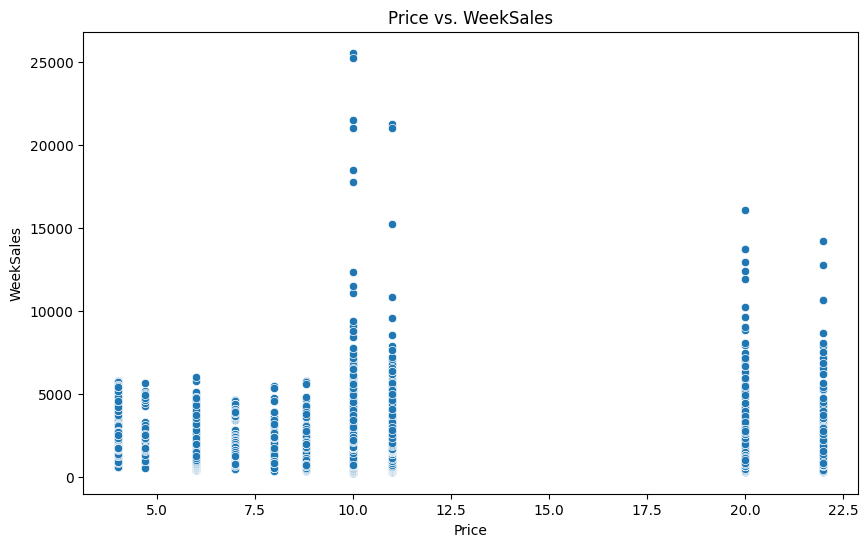

In [ ]:
# Scatter plot of Price vs. WeekSales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Weekly_Sales')
plt.title('Price vs. WeekSales')
plt.xlabel('Price')
plt.ylabel('WeekSales')
plt.show()

BoxPlot for weekly sales when there is promo and no promo

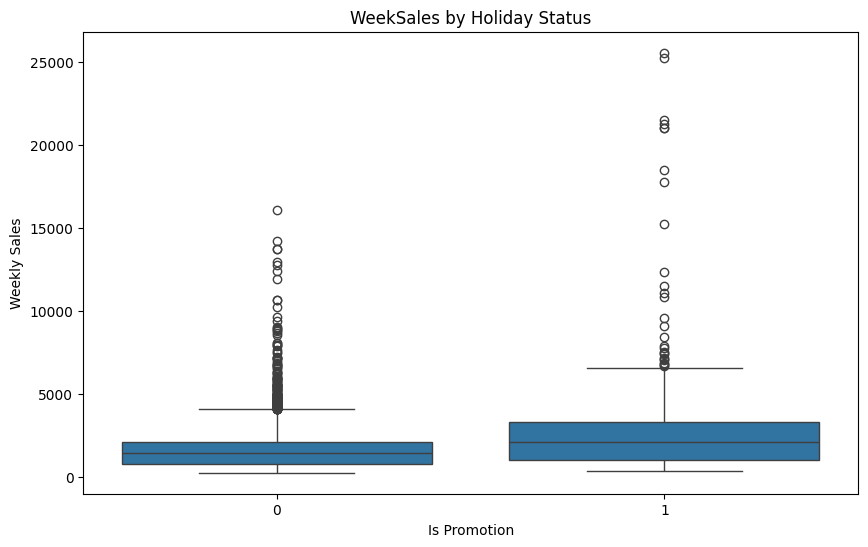

In [ ]:
# Box plot of WeekSales by Is_Promo
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Is_Promo', y='Weekly_Sales')
plt.title('WeekSales by Holiday Status')
plt.xlabel('Is Promotion')
plt.ylabel('Weekly Sales')
plt.show()


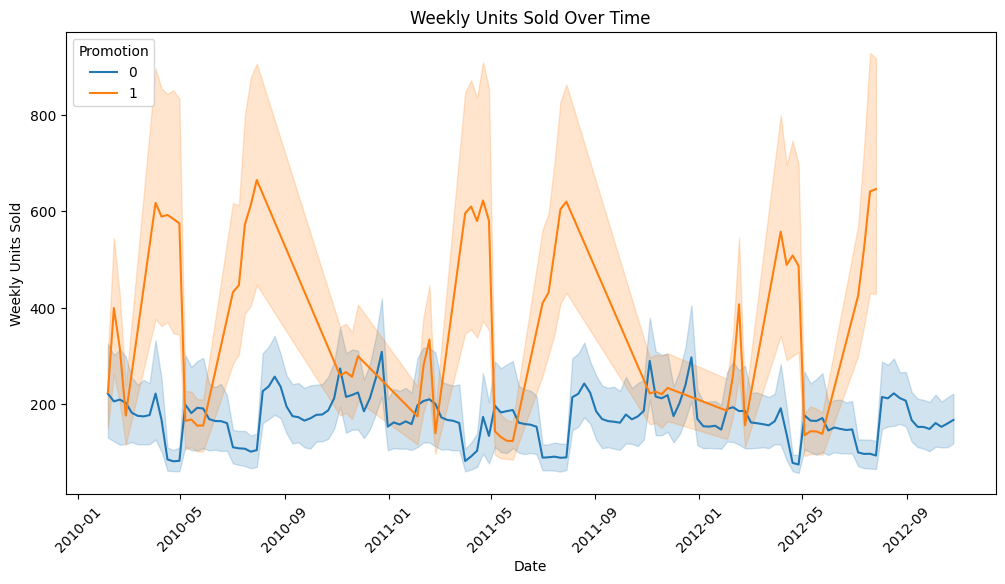

In [ ]:
# Line plot of Date vs. Weekly_Units_Sold, colored by Promotion
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Weekly_Units_Sold', hue='Is_Promo')
plt.title('Weekly Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Units Sold')
plt.legend(title='Promotion', loc='upper left')
plt.xticks(rotation=45)
plt.show()

Compare stores when there is promo and No promo

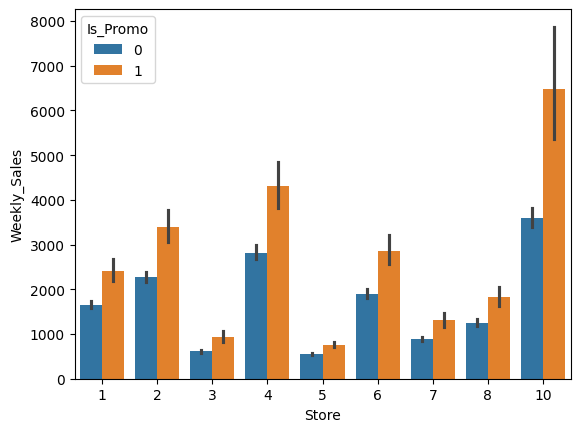

In [ ]:
# Bar plot of Weekly_Units_Sold for each store during promotions
sns.barplot(x="Store", y="Weekly_Sales", hue="Is_Promo", data=df)
plt.show()


From the table we can see that every store Have higher sales when there is promo and lower when there is no promo

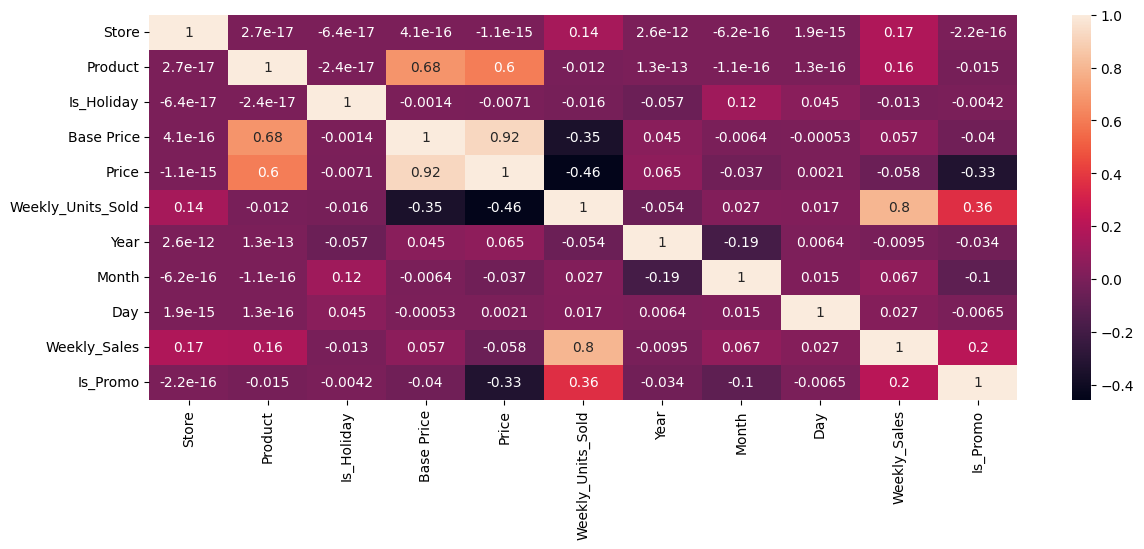

In [ ]:
plt.figure(figsize=(14,5))
# Heatmap for correlation between variables
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


<mark>From the heatmap, there is 0.36 correlation between Promo and Weekly Sold Products and 0.2 with Weekly Sales</mark>

In [ ]:
#Drop Base Price since it is correletated to price
df.drop(columns=["Base Price"],inplace=True)

Linear Regression Model

In [ ]:
# Define the features and target variable
X = df[['Store', 'Product', 'Is_Holiday','Price', 'Year', 'Month', 'Day',
       'Is_Promo']]
y = df['Weekly_Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Print the model's coefficients and p-values
coefficients = pd.Series(model.coef_, index=X_train.columns)

print("Coefficients:")
print(coefficients)

ols_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
pvalues = pd.Series(ols_model.pvalues, index=X_train.columns)
print("\nP-values:")
print(pvalues)

Coefficients:
Store         109.585471
Product       598.034298
Is_Holiday   -194.430779
Price         -49.018162
Year           55.429014
Month          46.441632
Day             5.736446
Is_Promo      826.685815
dtype: float64

P-values:
Store         8.074500e-23
Product       1.508919e-34
Is_Holiday    1.070005e-01
Price         3.687636e-12
Year          1.592367e-01
Month         2.164191e-06
Day           9.914377e-02
Is_Promo      2.343431e-20
dtype: float64


From the P Values we notice that Is_Holiday, Year, and Day are not significant since they have a highe p value which is more than 0.05  and  Store, Product, Price, Is_Promo, and Month are significant

<p>When a product is on promotion (Is_Promo = 1), the predicted weekly units sold would increase by 826.685815 units, assuming all other variables remain constant. Conversely, when a product is not on promotion (Is_Promo = 0), the predicted weekly units sold would decrease by the same amount (826.685815 units), holding all other variables constant.</p><p>
This finding indicates that promotional activities have a strong positive association with the weekly units sold, as the coefficient for Is_Promo is significantly positive. </p><p>Moreover, the small p-value suggests that the effect of Is_Promo on the weekly units sold is statistically significant, emphasizing the importance of promotional activities in driving sales.</p>

<h1>Segmentation  analysis</h1>

In [ ]:
# Perform segmentation analysis by grouping data by 'Product' category
for category, data in df.groupby('Product'):
    print(f"\nProduct category: {category}")

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(data[X.columns], data['Weekly_Sales'], test_size=0.2, random_state=42)

    # Initialize and fit the LinearRegression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Print the model's coefficients and p-values
    coefficients = pd.Series(model.coef_, index=X_train.columns)
    print("Coefficients:")
    print("Promo",coefficients['Is_Promo'])

    # Calculate p-values using OLS
    ols_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
    pvalues = pd.Series(ols_model.pvalues, index=X_train.columns)
    print("\nP-values:")
    print("Promo",pvalues['Is_Promo'])



Product category: 1
Coefficients:
Promo 120.2292235855463

P-values:
Promo 0.7151852040313789

Product category: 2
Coefficients:
Promo 428.2771985366774

P-values:
Promo 0.2618495707085959

Product category: 3
Coefficients:
Promo 1447.3661719779757

P-values:
Promo 0.06828185444017736


***Hypothesis***

* Ho: There Is no effects of Promo in Sales

* H1: There is effects of promo in sales

In [ ]:

features = ['Is_Promo']
X = df[features]
y = df['Weekly_Sales']

# Fit the LinearRegression model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Print the model's coefficients and p-values
coefficients = pd.Series(model.params, index=X.columns)
print("Coefficients:")
print(coefficients)

pvalues = pd.Series(model.pvalues, index=X.columns)
print("\nP-values:")
print(pvalues)


# Hypothesis testing
alpha = 0.05  # Significance level

if pvalues['Is_Promo'] < alpha:
    print("Reject the null hypothesis: The effect of promotions on sales is significant.")
else:
    print("Fail to reject the null hypothesis: There is insufficient evidence to conclude that the effect of promotions on sales is significant.")


Coefficients:
Is_Promo    970.1339
dtype: float64

P-values:
Is_Promo    7.375516e-38
dtype: float64
Reject the null hypothesis: The effect of promotions on sales is significant.
